<a href="https://colab.research.google.com/github/jcdumlao14/Homework-ml-zoomcamp/blob/main/02_Homework_Housing__Price_Prediction_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning - Linear Regression**

### Housing Prices Prediction

Dataset
In this homework, we will use the California Housing Prices from Kaggle.

Here's a wget-able link:

In [ ]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').



# **Setup**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")


# **Exploratory Data Analysis**

* Load the data.



In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-16 20:13:44--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.05s   

2022-09-16 20:13:45 (25.1 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [ ]:
df = pd.read_csv('housing.csv')
len(df)

20640

In [ ]:
print(df.shape)

(20640, 10)


In [ ]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


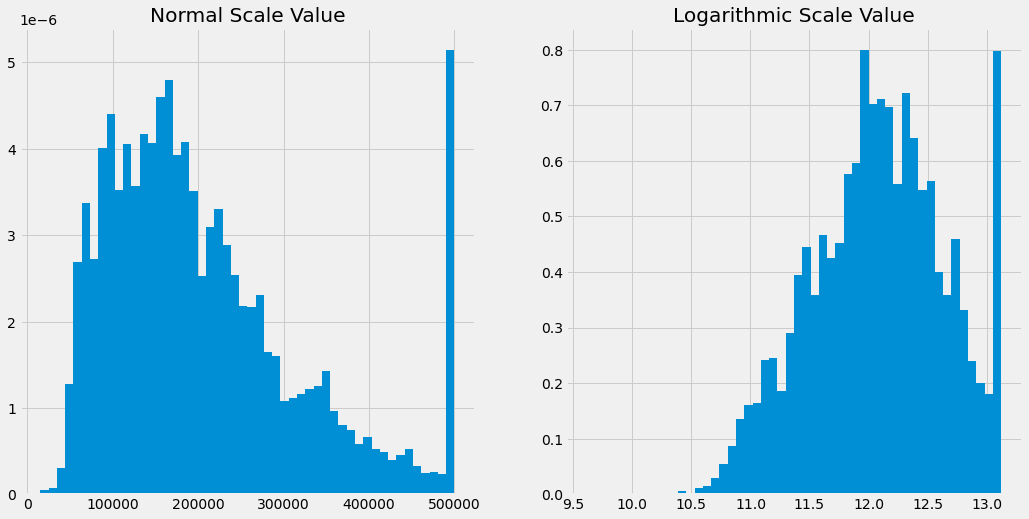

In [ ]:
"""
Look at the median_house_value variable. Does it have a long tail? 
"""

fig,axes = plt.subplots(1,2)
axes[0].hist(df['median_house_value'], density = True, bins = 50)
axes[0].set_title('Normal Scale Value')

axes[1].hist(np.log1p(df['median_house_value']), density = True, bins = 50)
axes[1].set_title('Logarithmic Scale Value');

Features

For the rest of the homework, you'll need to use only these columns:

* 'latitude',
* 'longitude',
* 'housing_median_age',
* 'total_rooms',
* 'total_bedrooms',
* 'population',
* 'households',
* 'median_income',
* 'median_house_value'

Select only them.

In [ ]:
usecols = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']


In [ ]:
df = pd.read_csv('housing.csv',usecols=usecols)

In [ ]:
df['income_cat'] = np.ceil(df['median_income'] /1.5)
df['income_cat'].where(df['income_cat'] <5,5.0, inplace = True)

In [ ]:
""" Print some of the statistics of each column """

for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842

income_cat
[5. 4. 3. 2. 1.]
5



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   income_cat          20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


# **Question 1**

Find a feature with missing values. How many missing values does it have?

* 207
* 307
* 408
* 508


In [ ]:
missing_vals = df.isnull().sum()
missing_vals.to_frame().reset_index().rename({'index':'Variables', 0: 'Missing Values'}, axis =1).sort_values(by = 'Missing Values', ascending = False).head(2).style.background_gradient('Blues')

,Variables,Missing Values
4,total_bedrooms,207
0,longitude,0


### **Answer:  207**

Null value checker

In [ ]:
incomplete = df.isna().mean()*100
print(incomplete[incomplete > 0])

total_bedrooms    1.002907
dtype: float64


In [ ]:
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
income_cat            False
dtype: bool

Duplicates

In [ ]:
df.duplicated().value_counts()

False    20640
dtype: int64

# **Question 2**

What's the median (50% percentile) for variable 'population'?

* 1133
* 1122
* 1166
* 1188


In [ ]:
df.describe(percentiles = [.50]).T

,count,mean,std,min,50%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-118.4900,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,34.2600,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,29.0000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,2127.0000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,435.0000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,1166.0000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,409.0000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,3.5348,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,179700.0000,500001.0000
income_cat,20640.0,3.006686,1.054618,1.0000,3.0000,5.0000


In [ ]:
np.median(df['population'])

1166.0

### **Answer: 1166.0**

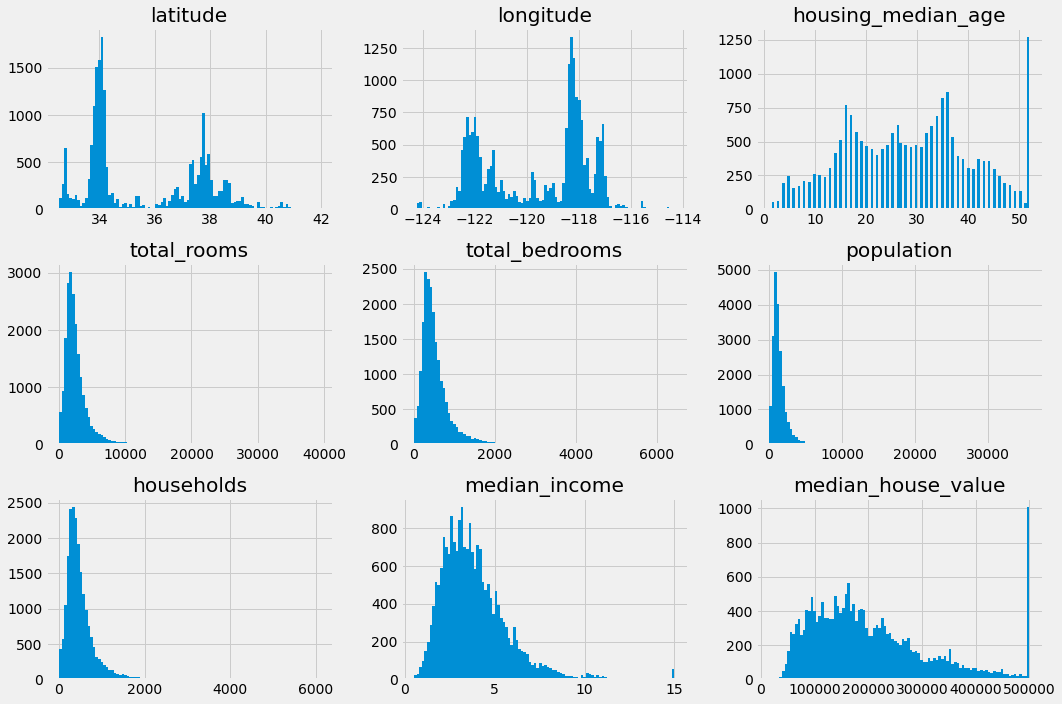

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.hist(bins =100, ax=ax, layout = (3,3), column = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'])
plt.tight_layout()
plt.show()


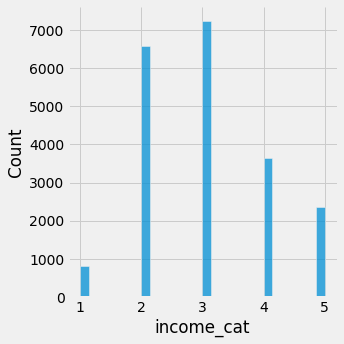

In [ ]:
sns.displot(df.income_cat)

Split the data

* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [ ]:
"""Split your data in train/val/test sets, with 60%/20%/20% distribution"""
n = len(df)

#Number of validation values
n_val = int(0.2 * n)

#Number of test set values
n_test = int(0.2 * n)

#Number of train set values
n_train = n -(n_val + n_test)

print(f"n_train:{n_train}, n_val: {n_val}, n_test:{n_test}")

n_train:12384, n_val: 4128, n_test:4128


In [ ]:
# create a NumPy array with indices from 0 to(n-1), and shuffle it
idx = np.arange(n)
print(idx)

[    0     1     2 ... 20637 20638 20639]


In [ ]:
# fixed the random seed to make sure that the results are reproducible
np.random.seed(42)
np.random.shuffle(idx)
print(idx)

[20046  3024 15663 ...  5390   860 15795]


In [ ]:
df_shuffled = df.iloc[idx]

In [ ]:
df_train = df_shuffled.iloc[: n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val :].copy()


In [ ]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,2.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,2.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,3.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,4.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,3.0


In [ ]:
# check length of the three datasets
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [ ]:
"""Dropping indexes now"""
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [ ]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,2.0
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,2.0
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,3.0
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,4.0
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,3.0


In [ ]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [ ]:
"""Apply the log transformation to the median_house_value variable using the np.log1p() function"""
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [ ]:
"""Make sure that the target value ('income_cat') is not in your dataframe"""
del df_train['income_cat']
del df_val['income_cat']
del df_test['income_cat']

In [ ]:
len(y_train)

12384

# **Question 3**

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the * RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

Options:

* With 0
* With mean
* With median
* Both are equally good

In [ ]:
"""Create a function for Training Linear Model"""
def train_linear_regression(X,y):

  """
  Including a biased term
  """
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones,X])

  """
  Gram Matrix
  """
  XTX = X.T.dot(X)

  """Inverse of Gram Matrix"""
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0],w[1:]


In [ ]:
check = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']


In [ ]:
"""We need to deal with missing values for the column from Q1"""

def prepare_X(df,fillna_value):
  df_num = df[check]
  df_num = df_num.fillna(fillna_value)
  X = df_num.values

  return X

In [ ]:
"""RMSE""" 

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()

    return np.sqrt(mse)

In [ ]:
"""fill it with 0 or with the mean of this variable and train a linear regression model"""

mean = df_train.median_house_value.mean()

X_mean_train = prepare_X(df_train,fillna_value = mean)
w_0_mean, w_mean =  train_linear_regression(X_mean_train,y_train)


In [ ]:
"""validation dataset to evaluate the models"""

X_mean_val = prepare_X(df_val,fillna_value = mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [ ]:
"""Round the RMSE scores to 2 decimal digits using round(score, 2)"""

np.round(rmse(y_val,y_mean_pred_val),2)

0.17

In [ ]:
X_null_train = prepare_X(df_train,fillna_value=0)

w_0_null,w_null = train_linear_regression(X_null_train, y_train)

X_null_val = prepare_X(df_val,fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)


In [ ]:
"""Round the RMSE scores to 2 decimal digits using round(score, 2)"""

np.round(rmse(y_val, y_null_pred_val),2)

0.17

### **Answer: Both are equally good**

# **Question 4**

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

* 0
* 0.000001
* 0.001
* 0.0001


In [ ]:
"""Create a function for Training Linear Regression Regularization Model"""

def train_linear_regression_reg(X,y, r = 0.0):

  """
  Including a biased term
  """
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones,X])

  """
  Gram Matrix
  """
  XTX = X.T.dot(X)

  """
  Regularization
  """
  reg = r + np.eye(XTX.shape[0])
  XTX = XTX + reg

  """Inverse of Gram Matrix"""
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0],w[1:]

In [ ]:
"""values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]"""

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:

  """
  Train a Regularized Linear Regression
  """
  w_0, w = train_linear_regression_reg(X_null_train,y_train,  r = r)

  """
  RMSE to evaluate the model on the validation dataset
  """
  y_null_reg_val = w_0 + X_null_val.dot(w)

  """
  Round the RMSE scores to 2 decimal digits
  """
  rmse_val = np.round(rmse(y_val,y_null_reg_val),2)
  
  print(r, w_0,rmse_val)

0 1.493166719902638 0.17
1e-06 1.4931659288703651 0.17
0.0001 1.4930876276172522 0.17
0.001 1.4923762528305609 0.17
0.01 1.4853073452341639 0.17
0.1 1.4188324895498892 0.17
1 1.0110924042524851 0.17
5 0.5523949816603357 0.17
10 0.4253959707550231 0.17


### **Answer:   0**

# **Question 5**

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))



> Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.



Options:

* 0.16
* 0.00005
* 0.005
* 0.15555


In [ ]:
"""Split your data in train/val/test sets, with 60%/20%/20% distribution"""
n = len(df)

#Number of validation values
n_val = int(0.2 * n)

#Number of test set values
n_test = int(0.2 * n)

#Number of train set values
n_train = n -(n_val + n_test)

print(f"n_train:{n_train}, n_val: {n_val}, n_test:{n_test}")

n_train:12384, n_val: 4128, n_test:4128


In [ ]:
n

20640

In [ ]:
"""seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"""

rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  idx = np.arange(n)
  print(idx)

[    0     1     2 ... 20637 20638 20639]
[    0     1     2 ... 20637 20638 20639]
[    0     1     2 ... 20637 20638 20639]
[    0     1     2 ... 20637 20638 20639]
[    0     1     2 ... 20637 20638 20639]
[    0     1     2 ... 20637 20638 20639]
[    0     1     2 ... 20637 20638 20639]
[    0     1     2 ... 20637 20638 20639]
[    0     1     2 ... 20637 20638 20639]
[    0     1     2 ... 20637 20638 20639]


In [ ]:
np.random.seed(r)
np.random.shuffle(idx)
print(idx)

[20558 11430  2656 ...  5014  9979   501]


In [ ]:
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[: n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val :].copy()


In [ ]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
20558,-121.80,38.67,10.0,2086.0,380.0,1073.0,378.0,4.5526,154400.0,4.0
11430,-117.97,33.66,22.0,3914.0,600.0,1871.0,607.0,5.8541,281500.0,4.0
2656,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0,2.0
14267,-117.11,32.69,37.0,2395.0,627.0,2489.0,599.0,1.5933,86300.0,2.0
3684,-118.37,34.21,36.0,1392.0,326.0,1181.0,303.0,3.1563,176400.0,3.0


In [ ]:
# check length of the three datasets
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [ ]:
"""Dropping indexes now"""

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [ ]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-121.80,38.67,10.0,2086.0,380.0,1073.0,378.0,4.5526,154400.0,4.0
1,-117.97,33.66,22.0,3914.0,600.0,1871.0,607.0,5.8541,281500.0,4.0
2,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0,2.0
3,-117.11,32.69,37.0,2395.0,627.0,2489.0,599.0,1.5933,86300.0,2.0
4,-118.37,34.21,36.0,1392.0,326.0,1181.0,303.0,3.1563,176400.0,3.0


In [ ]:
"""evaluate the model on the validation dataset and collect the RMSE scores"""

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [ ]:
# apply log to target y
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [ ]:
# delet income_cat from dataframe
del df_train['income_cat']
del df_val['income_cat']
del df_test['income_cat']

In [ ]:
len(y_train)

12384

In [ ]:
"""Fill the missing values with 0 and train a model without regularization"""

X_null_train = prepare_X(df_train,fillna_value=0)

w_0,w = train_linear_regression(X_null_train, y_train)

X_null_val = prepare_X(df_val,fillna_value=0)
y_null_val = w_0_null + X_null_val.dot(w)



In [ ]:
"""standard deviation of all the scores and To compute the standard deviation, use np.std"""

rmse_val = np.round(rmse(y_val,y_null_reg_val), 2)

rmse_list.append(rmse_val)

print(r, w_0, rmse_val)


9 3.656450168943698 0.79


In [ ]:
rmse_list

[0.79]

In [ ]:
"""Round the result to 3 decimal digits (round(std, 3))"""

np.round(np.std(rmse_list),3)

0.0

### **Answer: 0**

# **Question 6**

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* 0.35
* 0.135
* 0.450
* 0.245


## Seed and Regularization

In [ ]:
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n -(n_val + n_test)
print(f"n_train:{n_train}, n_val: {n_val}, n_test:{n_test}")

n_train:12384, n_val: 4128, n_test:4128


In [ ]:
# create a NumPy array with indices from 0 to(n-1), and shuffle it
r = 9
idx = np.arange(n)
print(idx)


[    0     1     2 ... 20637 20638 20639]


In [ ]:
# fixed the random seed to make sure that the results are reproducible
import random
from random import seed

np.random.seed(r)
np.random.shuffle(idx)
print(idx)

[20558 11430  2656 ...  5014  9979   501]


In [ ]:
"""Combine train and validation datasets"""

df_shuffled = df_shuffled.iloc[:n_train].copy()
df_train = df_shuffled.iloc[:n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val :].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train_val = df_train_val.median_house_value.values
y_test = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val)
y_test = np.log1p(y_test)



In [ ]:
del df_train_val['income_cat']
del df_test['income_cat']

In [ ]:
"""Fill the missing values with 0 and train a model with r=0.001"""

X_null_train_val = prepare_X(df_train_val,fillna_value=0)

w_0_train_val,w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r = 0.001)

X_null_test = prepare_X(df_test,fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)


In [ ]:
"""RMSE on the test dataset"""

np.round(rmse(y_test,y_null_pred_test), 2)

nan

### **Answer: 0**